In [25]:
import os

import pandas as pd
import seaborn as sns
import feature_engine as ft
from matplotlib import pyplot as plt
import numpy as np

sns.set_style("whitegrid")

In [26]:
path_save = '../experiments/experiment1/automl/'

In [27]:
data = pd.read_csv('../experiments/automl_small/automl.csv')

In [28]:
data = data[['op', 'initial_fitness', 'nonterminal_nodes', 'mean', 'median', 'std', 'min', 'max', 'zero', 'positive', 'negative']]

change = []
for d in data['initial_fitness']:
    d = float(d[1:len(d)-2])
    change.append(d)
data['initial_fitness'] = change
data

,op,initial_fitness,nonterminal_nodes,mean,median,std,min,max,zero,positive,negative
0,2,4.125289e+03,4,-1.893446e+03,0.000000,7.248295e+03,-1.506370e+04,6.817195e+03,0.375000,0.250000,0.375000
1,2,8.351417e+02,4,-7.370408e+03,-4322.288890,9.858593e+03,-2.308818e+04,3.017427e+03,0.250000,0.250000,0.500000
2,2,2.116071e+04,4,-6.877998e+03,0.000000,2.470726e+04,-6.330322e+04,2.132303e+04,0.375000,0.250000,0.375000
3,2,7.639337e+03,4,6.029330e+02,0.000000,1.080757e+04,-2.126815e+04,1.879135e+04,0.375000,0.250000,0.375000
4,2,5.390827e+03,4,1.323948e+03,0.000000,3.358996e+03,-3.447107e+03,8.790761e+03,0.375000,0.500000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...
66,4,1.810000e+01,10,-1.258663e+12,0.000000,7.498127e+12,-5.156909e+13,2.776797e+07,0.320000,0.340000,0.280000
67,4,9.897402e+03,10,-3.383601e+08,0.000000,1.402806e+09,-7.140284e+09,1.192777e+09,0.480000,0.100000,0.420000
68,4,3.487973e+00,10,-7.732179e+10,0.003757,5.384239e+11,-3.846263e+12,8.346981e+04,0.540000,0.100000,0.360000
69,4,1.110986e+06,9,-2.405478e+17,0.000000,1.443350e+18,-9.304909e+18,2.205207e+13,0.444444,0.111111,0.444444


In [29]:
def plot_positive_negative(data, column, path_file):
    colors = ['blue', 'gray', 'red']
    negative, positive, zero = data['negative'], data['positive'], data['zero']
    values = []
    for n, p, z, non_t in zip(negative, positive, zero, data[column]):
        values.append([n, non_t, 'negative'])
        values.append([z, non_t, 'zero'])
        values.append([p, non_t, 'positive'])
    data_m = pd.DataFrame(values, columns=['percent', column, 'sign'])

    sns.boxplot(x=column, y="percent", hue='sign', palette=colors, data=data_m, showfliers = False)
    plt.savefig(path_file, dpi=300)
    plt.show()

def plot_positive_negative_facet(data, column1, column2, path_file):
    colors = ['blue', 'gray', 'red']
    negative, positive, zero = data['negative'], data['positive'], data['zero']
    values = []
    for n, p, z, op, non_t in zip(negative, positive, zero, data[column1], data[column2]):
        values.append([n, op, non_t, 'negative'])
        values.append([z, op, non_t, 'zero'])
        values.append([p, op, non_t, 'positive'])
    data_m = pd.DataFrame(values, columns=['percent', column1, column2, 'sign'])

    g = sns.FacetGrid(data_m, col=column1, col_wrap=3)
    g.map_dataframe(sns.boxplot, column2, "percent", hue='sign', palette=colors, data=data_m, showfliers = False)
    g.add_legend()
    plt.show()
    g.savefig(path_file, dpi=300)

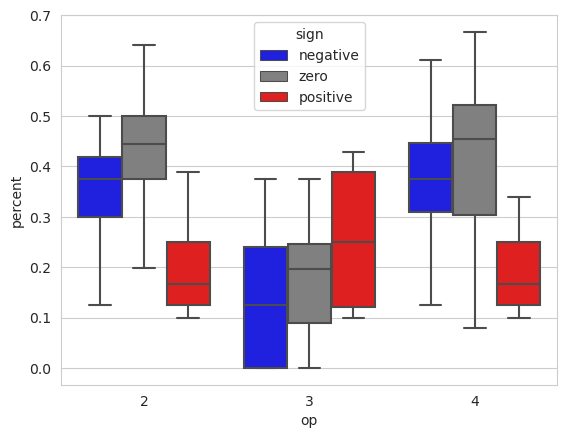

In [30]:
plot_positive_negative(data, 'op', os.path.join(path_save, 'op_pos_neg.png'))

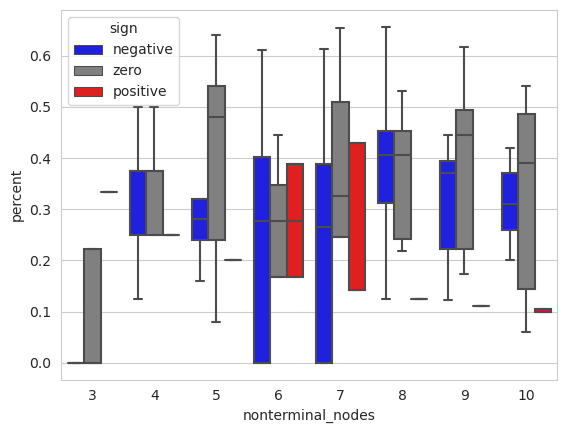

In [31]:
plot_positive_negative(data, 'nonterminal_nodes', os.path.join(path_save, 'nont_pos_neg.png'))

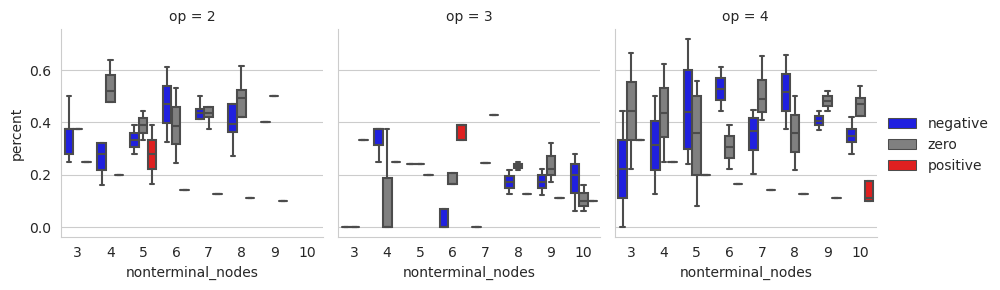

In [32]:
plot_positive_negative_facet(data, 'op', 'nonterminal_nodes', os.path.join(path_save, 'op_nont_pos_neg.png'))

In [33]:
def plot_ranges(data, column, path_file):
    colors = ['red', 'gray', 'blue']
    values = []
    for mean, mini, maxi, non_t in zip(data['mean'], data['min'], data['max'], data[column]):
        values.append([maxi, non_t, 'max'])
        values.append([mini, non_t, 'min'])
        values.append([mean, non_t, 'mean'])
    data_m = pd.DataFrame(values, columns=['range', column, 'type'])
    sns.boxplot(x=column, y="range", hue='type', palette=colors, data=data_m, showfliers = False, hue_order=['max', 'mean', 'min'])
    plt.savefig(path_file, dpi=300)
    plt.show()

def plot_ranges_facets(data, column1, column2, path_file):
    colors = ['red', 'gray', 'blue']
    values = []
    for maxi, mini, mean, op, non_t in zip(data['max'], data['min'], data['mean'], data[column1], data[column2]):
        values.append([maxi, op, non_t, 'max'])
        values.append([mini, op, non_t, 'min'])
        values.append([mean, op, non_t, 'mean'])
    data_m = pd.DataFrame(values, columns=['range', column1, column2, 'type'])

    g = sns.FacetGrid(data_m, col=column1, sharex=False, sharey=False, col_wrap=3)
    g.map_dataframe(sns.boxplot, x=column2, y="range", hue='type', palette=colors, data=data_m, showfliers = False, hue_order=['max', 'mean', 'min'])
    g.add_legend()
    g.savefig(os.path.join(path_save, 'op_nont_range.png'), dpi=300)
    plt.show()

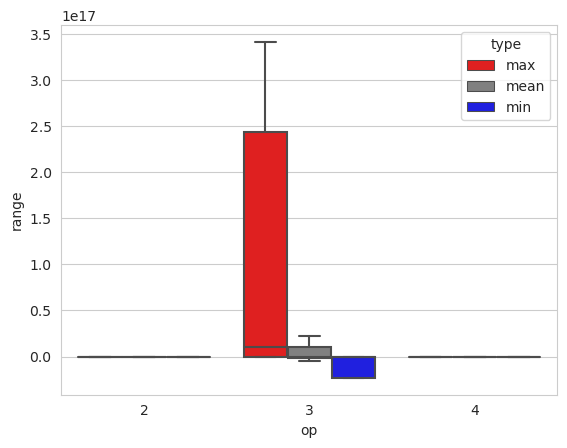

In [34]:
plot_ranges(data, 'op', os.path.join(path_save, 'op_range.png'))

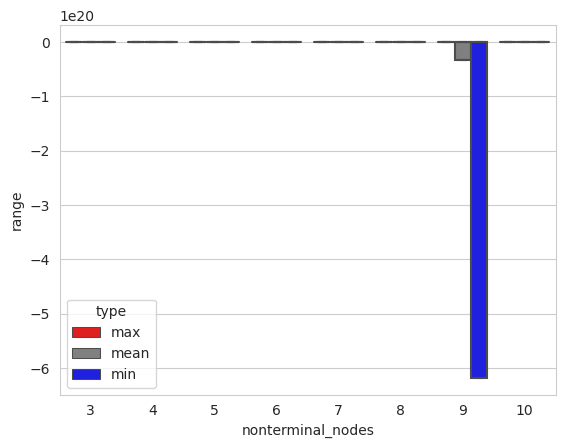

In [35]:
plot_ranges(data, 'nonterminal_nodes', os.path.join(path_save, 'nont_range.png'))

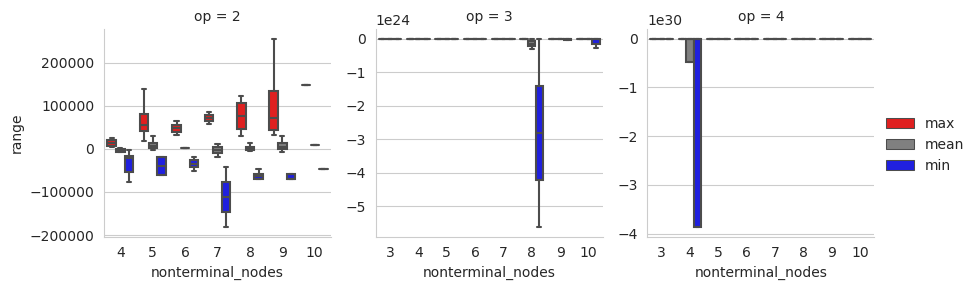

In [36]:
plot_ranges_facets(data, 'op', 'nonterminal_nodes', os.path.join(path_save, 'op_nont_range.png'))